In [50]:
import struct
import numpy as np
import os
from datetime import datetime


# **Step1**

In [51]:
def ReLU(z):
 return np.maximum(0,z)
def sigmoid(z):
 return 1./(1.+np.exp(-z))
def tanh(z):
 return np.tanh(z)
def softmax(X):
 e = np.exp(X)
 p = e/np.sum(e, axis=0)
 return p



# **Step 2**

In [52]:
def dReLU(z):
 return (z > 0) * 1
def dSigmoid(z):
 return sigmoid(z) *(1-sigmoid (z))
def dTanh(z):
 return 1/(np.cosh(z)**2)

# **Step 3 catogarical loss entropy, forword prop, back prop , update parameter, classifiers**

In [53]:

def crossEntropyR2(y, y_hat, lamda, params):
 m = y.shape[1]
 cost = -(1/m) * np.sum(y*np.log(y_hat))+lamda/(2*m) *(np.sum(params['W1']**2)+np.sum(params['W2']**2))
 return cost
def crossentropy1(y, y_hat):
 m = y.shape[1]
 cost = -(1/m) * np.sum(y*np.log(y_hat))
 return cost
def forward(X,params,activation):
 forwardPass = {}
 forwardPass['Z1'] = np.matmul(params['W1'], X) + params['b1']
 forwardPass['A1'] = activation(forwardPass['Z1'])
 forwardPass['Z2'] = np.matmul(params['W2'],forwardPass['A1']) + params['b2']
 forwardPass['A2'] = softmax(forwardPass['Z2'])
 return forwardPass
def back(X, y,forwardPass, params,dActivation):
 m = X.shape[1]
 gradient = {}
 gradient['dZ2'] = forwardPass['A2'] - y
 gradient['dW2'] = (1./m) * np.matmul(gradient['dZ2'], forwardPass['A1'].T)
 gradient['db2'] = (1./m) * np.sum(gradient['dZ2'], axis=1, keepdims=True)
 gradient['dA1'] = np.matmul(params['W2'].T, gradient['dZ2'])
 gradient['dZ1'] = gradient['dA1'] * dActivation(forwardPass['Z1'])
 gradient['dW1'] = (1./m) * np.matmul(gradient['dZ1'], X.T)
 gradient['db1'] = (1./m) * np.sum(gradient['dZ1'])
 return gradient

def updater(params,grad,eta,lamda,m):#with regurization
  updateParams={}
  updateParams['W2']=params['W2']-eta*grad['dW2'] - (params['W2']*lamda*eta)/m
  updateParams['b2']=params['b2']-eta*grad['db2']
  updateParams['W1']=params['W1']-eta*grad['dW1'] - (params['W1']*lamda*eta)/m
  updateParams['b1']=params['b1']-eta*grad['db1']
  return updateParams

def classifier(x,params,activation):
  Z1=np.matmul(params['W1'],x)+params['b1']
  A1=activation(Z1)
  Z2=np.matmul(params['W2'],A1)+params['b2']
  A2=softmax(Z2)
  pred=np.argmax(A2,axis=0)
  return pred

# **Step 4 define data loader and preprocessing steps**

In [54]:
df = pd.read_csv('mnist_train.csv')
X_train = df.drop('label',axis = 1)
y_train = df['label']
# Reading test data
df2 = pd.read_csv('mnist_test.csv')
X_test = df2.drop('label',axis = 1)
y_test = df2['label']
# Normalizing and reshaping the train and test images
X_train = (np.array(X_train))/255
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1])
X_train = X_train.T
X_test = (np.array(X_test))/255
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1])
X_test = X_test.T
y_train = np.array(y_train)
n = np.max(y_train)+1
y_train = np.eye(n)[y_train]
y_train = y_train.T
# Converting y_test to numpy array
y_test = np.array(y_test)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(784, 60000) (10, 60000) (784, 10000) (10000,)


# ** step 5 Hyper Parameter Setting**

In [55]:
m = 10000 #batch size
n_x = X_train.shape[0]
n_h = 100
eta = 0.5
lamda = 1.5
np.random.seed(7)
epoch = 100
import matplotlib.pyplot as plt

# **step 6**

# **case 1 Sigmoid activation**

4
(100, 784)
Final sigmoidParams
4
Final Training accuracy 0.8634
Final cost: 0.5785953995414456
time to train: 0:00:38.246465
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Test Accuracy: 0.878


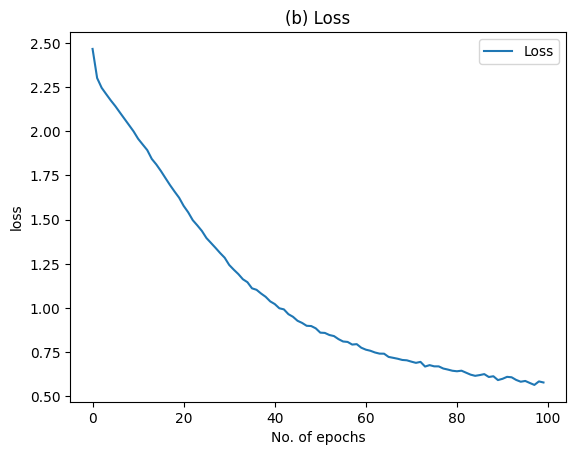

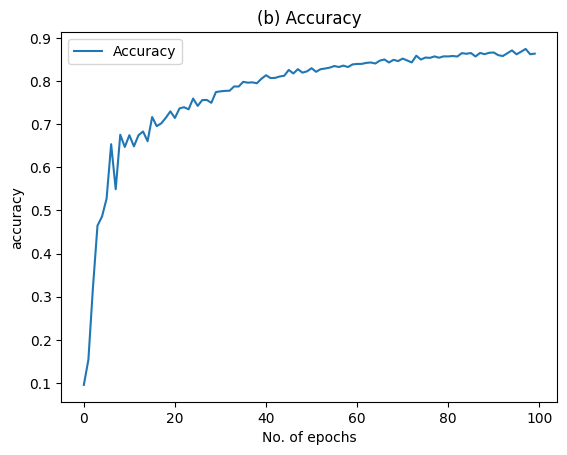

In [56]:
sigmoidParams = {'W1': np.random.randn(n_h, n_x)* np.sqrt(1. / n_x),
 'b1': np.zeros((n_h, 1)),
 'W2': np.random.randn(10, n_h)* np.sqrt(1. / n_h),
 'b2': np.zeros((10, 1))
 }
print(len(sigmoidParams))
# print("Initial value of W1 = ",sigmoidParams['W1'])
w1 = np.array(sigmoidParams['W1'])
print(w1.shape)
start = datetime.now()
l =[]
acc = []
## Mini batch Grandient Optimization Algorithms
for i in range(epoch):
 #shuffle batch index
 idx = np.random.permutation(X_train.shape[1])[:m]
 X=X_train[:,idx]
 y=y_train[:,idx]

 #forward pass
 forwardPass = forward(X,sigmoidParams,sigmoid)
 cost = crossEntropyR2(y, forwardPass['A2'], lamda, sigmoidParams)
 #back Prop
 gradient = back(X, y, forwardPass, sigmoidParams,dSigmoid)

 #updating weights
 sigmoidParams=updater(sigmoidParams,gradient,eta,lamda,m)

 ## Training accuracy
 n_y = np.argmax(y,axis=0)
 n_p = np.argmax(forwardPass['A2'],axis=0)
 Acc = sum(n_p==n_y)/(len(n_y))
 l.append(cost)
 acc.append(Acc)
difference = datetime.now() - start
print("Final sigmoidParams")
print(len(sigmoidParams))
print("Final Training accuracy", Acc)
print("Final cost:", cost)
print('time to train:', difference)
y_hat = classifier(X_test, sigmoidParams, sigmoid)
print(y_hat[0:20])
print(y_test[0:20])
print('Test Accuracy:',sum(y_hat==y_test)*1/len(y_test))
plt.plot(l, label = 'Loss')
plt.legend()
plt.xlabel("No. of epochs")
plt.ylabel("loss")
plt.title("(b) Loss")
plt.show()
## Ploting of training loss
plt.plot(acc, label = 'Accuracy')
plt.legend()
plt.xlabel("No. of epochs")
plt.ylabel("accuracy")
plt.title("(b) Accuracy")
plt.show()

# **TanH activation function**

Final cost: 0.323282398443321
time to train: 0:00:40.698904
Final tanhParams
4
Final Training accuracy 0.9093
Final cost: 0.323282398443321
time to train: 0:00:40.698904
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Test Accuracy: 0.9143


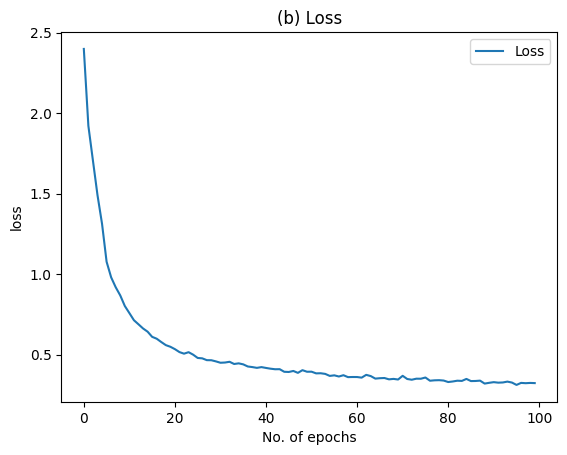

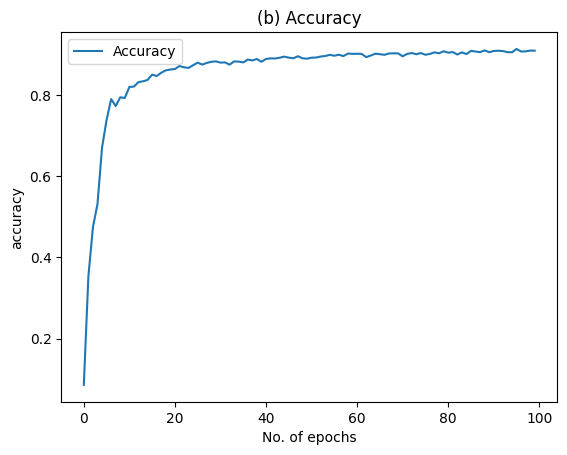

In [57]:
tanhParams = {'W1': np.random.randn(n_h, n_x)* np.sqrt(1. / n_x),
 'b1': np.zeros((n_h, 1)),
 'W2': np.random.randn(10, n_h)* np.sqrt(1. / n_h),
 'b2': np.zeros((10, 1))
 }
start = datetime.now()
l =[]
acc = []
for i in range(epoch):
 #shuffle batch index
 idx = np.random.permutation(X_train.shape[1])[:m]
 X=X_train[:,idx]
 y=y_train[:,idx]
 #forward pass
 forwardPass = forward(X,tanhParams,tanh)
 #cost
 # Loss Function with regularization
 #cost = crossEntropyR2(y, forwardPass['A2'], lamda, tanhParams)
 # without regularization
 cost = crossentropy1(y, forwardPass['A2'])
 #back Prop
 gradient = back(X, y, forwardPass, tanhParams,dTanh)
 #updating weights
 tanhParams=updater(tanhParams,gradient,eta,lamda,m)
 n_y = np.argmax(y,axis=0)
 n_p = np.argmax(forwardPass['A2'],axis=0)
 Acc = sum(n_p==n_y)/(len(n_y))
 l.append(cost)
 acc.append(Acc)

difference = datetime.now() - start
print("Final cost:", cost)
print('time to train:', difference)
print("Final tanhParams")
print(len( tanhParams))
print("Final Training accuracy", Acc)
print("Final cost:", cost)
print('time to train:', difference)
y_hat = classifier(X_test, tanhParams, tanh)
print(y_hat[0:20])
print(y_test[0:20])
print('Test Accuracy:',sum(y_hat==y_test)*1/len(y_test))
## Ploting of training loss
plt.plot(l, label = 'Loss')
plt.legend()
plt.xlabel("No. of epochs")
plt.ylabel("loss")
plt.title("(b) Loss")
plt.show()
plt.plot(acc, label = 'Accuracy')
plt.legend()
plt.xlabel("No. of epochs")
plt.ylabel("accuracy")
plt.title("(b) Accuracy")
plt.show()

# **Case 3 Relu activation**

Final reluParams
4
Final Training accuracy 0.9263
Final cost: 0.2705430363313186
time to train: 0:00:30.154336
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Test Accuracy: 0.9257


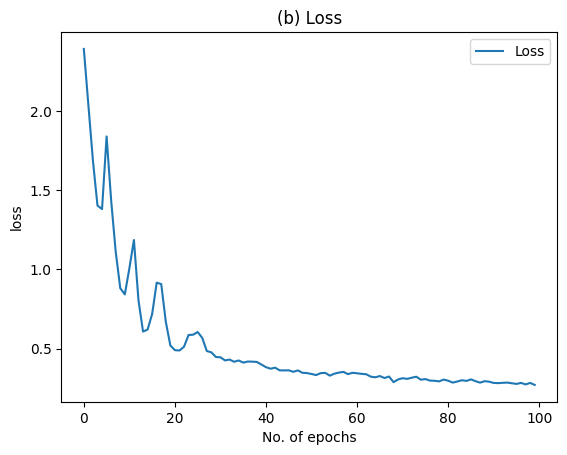

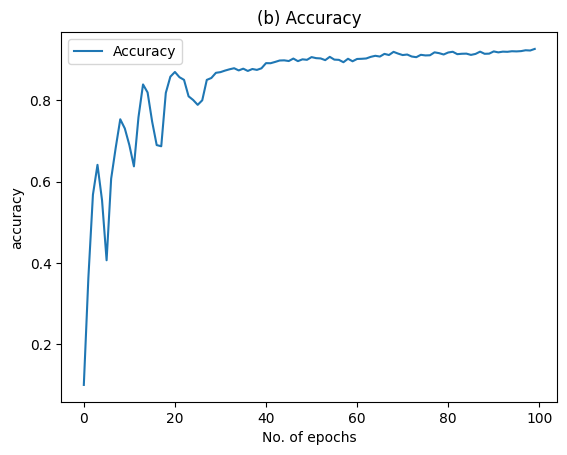

In [58]:
reluParams = {'W1': np.random.randn(n_h, n_x)* np.sqrt(2. / n_x),
 'b1': np.zeros((n_h, 1)),
 'W2': np.random.randn(10, n_h)* np.sqrt(2. / n_h),
 'b2': np.zeros((10, 1))
 }
start = datetime.now()
l =[]
acc = []
for i in range(epoch):
 idx = np.random.permutation(X_train.shape[1])[:m]
 X=X_train[:,idx]
 y=y_train[:,idx]
 #forward pass
 forwardPass = forward(X,reluParams,ReLU)
 # cost
 # Loss Function with regularization
 # cost = crossEntropyR2(y, forwardPass['A2'], lamda, reluParams)
 # without regularization
 cost = crossentropy1(y, forwardPass['A2'])
 #back Prop
 gradient = back(X, y, forwardPass, reluParams,dReLU)
 #updating weights
 reluParams=updater(reluParams,gradient,eta,lamda,m)
 n_y = np.argmax(y,axis=0)
 n_p = np.argmax(forwardPass['A2'],axis=0)
 Acc = sum(n_p==n_y)/(len(n_y))
 l.append(cost)
 acc.append(Acc)

difference = datetime.now() - start
print("Final reluParams")
print(len(reluParams))
print("Final Training accuracy", Acc)
print("Final cost:", cost)
print('time to train:', difference)
y_hat = classifier(X_test, reluParams, ReLU)
print(y_hat[0:20])
print(y_test[0:20])
print('Test Accuracy:',sum(y_hat==y_test)*1/len(y_test))
## Ploting of training loss
plt.plot(l, label = 'Loss')
plt.legend()
plt.xlabel("No. of epochs")
plt.ylabel("loss")
plt.title("(b) Loss")
plt.show()
## Ploting of training loss
plt.plot(acc, label = 'Accuracy')
plt.legend()
plt.xlabel("No. of epochs")
plt.ylabel("accuracy")
plt.title("(b) Accuracy")
plt.show()